# Support Vector Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('SampleData.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
y = np.array(y).reshape(-1,1)
dataset.head(5)

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Training the Support Vector Regression model on the Training set

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting the Results

In [6]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([78.86474326, 93.07233808, 82.04137655, 79.79709186, 76.72265591,
       90.54612743, 60.38192467, 58.55099588, 71.12798091, 62.11580563,
       69.89505864, 59.0668753 , 61.31339316, 84.32726724, 85.42956343,
       59.33656194, 74.69547341, 76.54528267, 53.41532363, 68.30603506])

## Comparing the Real Values with Predicted Values

In [7]:
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,78.211518,78.864743
1,97.919821,93.072338
2,91.486778,82.041377
3,79.550437,79.797092
4,85.668203,76.722656
5,93.576119,90.546127
6,65.562301,60.381925
7,56.877213,58.550996
8,82.905981,71.127981
9,76.617341,62.115806


## Visualising the SVR Results

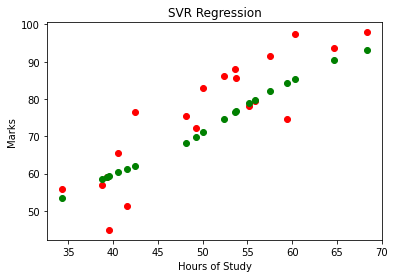

In [8]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()

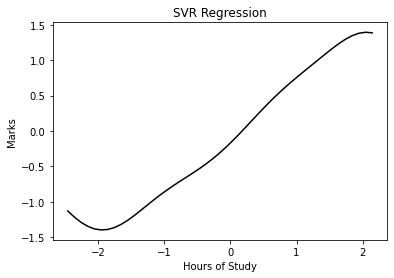

In [9]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()